<a href="https://colab.research.google.com/github/arjunkpreman/Transfer-Learning-Project/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [5]:
# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # num_classes is the number of classes in your task

In [6]:

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

In [7]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3015 images belonging to 10 classes.


In [9]:
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 921 images belonging to 10 classes.


In [10]:
# Train the model
r=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=10
)

<ipython-input-10-07f1f0826cdd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/10
94/94 [==============================] - 818s 9s/step - loss: 0.8896 - accuracy: 0.7117 - val_loss: 0.4623 - val_accuracy: 0.8538
Epoch 2/10
94/94 [==============================] - 15s 160ms/step - loss: 0.2739 - accuracy: 0.9216 - val_loss: 0.3263 - val_accuracy: 0.8973
Epoch 3/10
94/94 [==============================] - 15s 161ms/step - loss: 0.0898 - accuracy: 0.9836 - val_loss: 0.2263 - val_accuracy: 0.9319
Epoch 5/10
94/94 [==============================] - 15s 157ms/step - loss: 0.0544 - accuracy: 0.9926 - val_loss: 0.2484 - val_accuracy: 0.9230
Epoch 6/10
94/94 [==============================] - 15s 157ms/step - loss: 0.0337 - accuracy: 0.9987 - val_loss: 0.2096 - val_accuracy: 0.9319
Epoch 7/10
94/94 [==============================] - 16s 175ms/step - loss: 0.0269 - accuracy: 0.9983 - val_loss: 0.2432 - val_accuracy: 0.9185
Epoch 8/10
94/94 [==============================] - 17s 183ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2241 - val_accuracy: 0.9286
E

In [11]:
import matplotlib.pyplot as plt

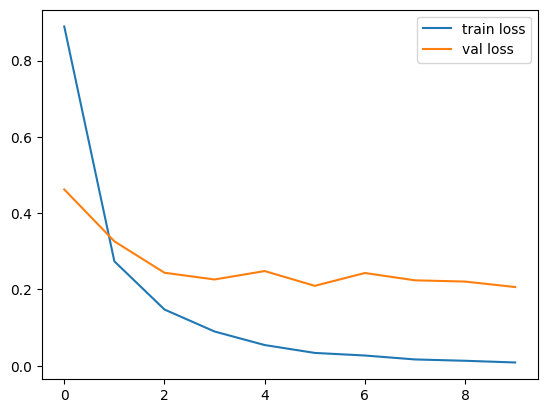

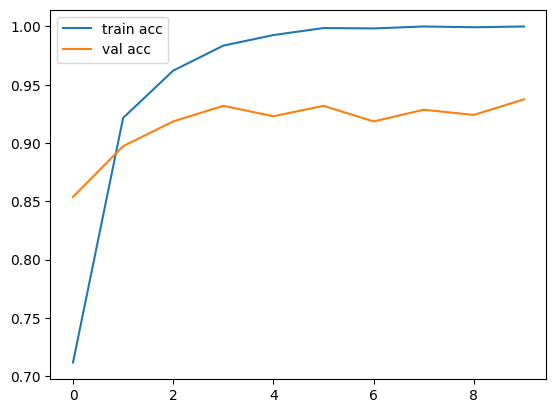

<Figure size 640x480 with 0 Axes>

In [12]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
# Save the trained model
model.save('/content/drive/MyDrive/Dataset/Model_MobileNet.h5')

In [14]:

model.evaluate(val_generator)

29/29 [==============================] - 4s 142ms/step - loss: 0.2016 - accuracy: 0.9392


[0.2015988528728485, 0.9391965270042419]